# 🧪🖥 Lab 7: Pollutant Triangulation

This lab uses classes to solve a problem involving pollutant triangulation.



In [7]:
! pip install drexel-jupyter-logger

In [8]:
import drexel_jupyter_logger
import matplotlib.pyplot as plt
import numpy as np
# import IPython.display as ipd

## Use triangulation to locate pollutant source

Triangulation, such as used in GPS positioning uses three points and two distances to calculate the location of an unknown point.

Now, let's suppose that the unknown point is actually a point source for some pollutant X, and at time 0 it
releases a burst of Chemical X. Assume no wind, and that X diffuses freely from its release point. 

Suppose that we have measurement devices at the three points 1, 2, and 3 that track the concentration of X as a function of time, and that the concentration of X is detected to peak at times $t_1$, $t_2$, and $t_3$, at each point, respectively. Can we determine the location of the evil point source?

## Task 1: Make a class for point in pollutant system

In this system, we have collected data at points $(x_1,y_1)$, $(x_2,y_2)$, and $(x_3,y_3)$, at times $t_1$, $t_2$, and $t_3$ respectively. We would like to encapsulate this data, and find a way to extract distance using the diffusivity of $X$ $(D_X)$.

Let's make the assumption that the time intervals $(t_i)$ scale with the square of the distance $(d_i)$ divided by the diffusivity of $X$ $(D_X)$:

$$ t_i ~ \frac{d_i^2}{D_X} $$

We can express the diffusivity using the following diffusion constant:

$$ K = \sqrt{D_X} $$

That satisfies the conditions
$$ d_1 = K\sqrt{t_1} $$
$$ d_2 = K\sqrt{t_2} $$
$$ d_3 = K\sqrt{t_3} $$

Write python code to do the following:

* Define a class called `Point`
* Define the class constructor to accept as argument the floats `x,y,t`, in that order. Make sure your parameters are in the right order! Store each value in a data member, so that they can be used in other methods. 
* Define a method called `diffusion_distance` which accepts as input the constant `K`, and returns the distance calculated using the Point member `self.t`.

Your code replaces the prompt:  `...`

Members of P1: (0,1,1)
Calculate diffusion distance of P1: 2.5


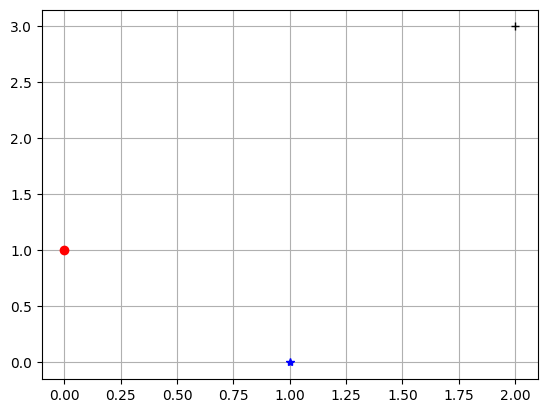

In [9]:
# BEGIN SOLUTION
class Point:
    def __init__(self,x,y,t):
        self.x = x
        self.y = y
        self.t = t

    def diffusion_distance(self,K):
        return K*self.t**0.5
# END SOLUTION

# Create point objects P1, P2, P3
Pt1 = Point(0,1,1)
Pt2 = Point(1,0,2)
Pt3 = Point(2,3,2)

print(f'Members of P1: ({Pt1.x},{Pt1.y},{Pt1.t})')

# Solve diffusion distance
dist1 = Pt1.diffusion_distance(2.5)
print('Calculate diffusion distance of P1:', dist1)

# Plot P1,P2,P3
plt.clf()
plt.plot(Pt1.x,Pt1.y,'ro')
plt.plot(Pt2.x,Pt2.y,'b*')
plt.plot(Pt3.x,Pt3.y,'k+')
plt.grid()

In [10]:
""" # BEGIN TEST CONFIG
points: 1
success_message: Point.x is correct.
""" # END TEST CONFIG

import numpy as np
import drexel_jupyter_logger

P = Point(1,2,3)
drexel_jupyter_logger.variable_logger(P)
assert np.all(np.isclose(P.x, 1) )

In [11]:
""" # BEGIN TEST CONFIG
points: 1
success_message: Point.y is correct.
""" # END TEST CONFIG

import numpy as np

P = Point(1,2,3)

import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(P)

assert np.all(np.isclose(P.y, 2) )

In [12]:
""" # BEGIN TEST CONFIG
points: 1
success_message: Point.t is correct.
""" # END TEST CONFIG


import numpy as np

P = Point(1,2,3)

import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(P.t)

assert np.all(np.isclose(P.t, 3) )

In [13]:
""" # BEGIN TEST CONFIG
points: 2
success_message: P.diffusion_distance(0) is correct.
""" # END TEST CONFIG

import numpy as np

P = Point(1,2,3)
answer = P.diffusion_distance(0)

import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(answer)

assert np.all(np.isclose(answer, 0))

In [14]:
""" # BEGIN TEST CONFIG
points: 2
success_message: P.diffusion_distance(4) is correct.
""" # END TEST CONFIG

import numpy as np

P = Point(1,2,3)
answer = P.diffusion_distance(4)

import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(answer)

assert np.all(np.isclose(answer, 6.928203230275509))

## Task 2: Make a class to triangulate between 3 points

In the previous task, we determined how to calculate the distance between a point and a pollutant source, given diffusion constant $K$ and time $t$. How can we use this information to find the location of a pollutant source?

**Intro to Triangulation** 

Triangulation is the process of locating an unknown point given two know points, and two known distances.

Consider two points $(x_1,y_1)$ and $(x_2,y_2$).

Let $(x,y)$ be an unknown point whose respective distances to the two points, $d_1$ and $d_2$, are known. The Pythagorean theorem allows us to express $x$ and $y$ (the coordinates of the unknown point) in terms of $(x_1,y_1)$, $(x_2,y_2)$, $d_1$, and $d_2$:
$$ d_1^{2} = (x - x_1)^{2} + (y - y_1)^{2}$$
$$ d_2^{2} = (x - x_2)^{2} + (y - y_2)^{2}$$


Inverting these two formulae to make them explicit in $x$ and $y$ is really a lot of fun, but it takes a while. Here is the final result:
$$ x_{\pm} = \frac{1}{2(1 + b^2)} \left[ 2 [x_1 - b(a - y_1)] \pm [4(b(a - y_1) - x_1)^2 - 4(1 + b^2)(x_1^{2} - d_1^{2} + (y_1 - a)^{2})]^{\frac{1}{2}} \right] $$
$$ y_{\pm} = a + bx_{\pm} $$

where
$$ a = \frac{d_1^{2} - d_2^{2} - [(x_1^{2} + y_1^{2}) - (x_2^{2} + y_2^{2})]}{2(y_2 - y_1)} $$

and 
$$ b = - \frac{x_2 - x_1}{y_2 - y_1} $$

Note that the two possible values for $x$, $x_+$ and $x_-$, arise from the positive and negative sense of the square root, and the value of $y$ derives from its particular $x$. So because of the power of 2 in the Pythagorean theorem, we find that there are **two possible points**, $(x_+, y_+)$ and $(x_-, y_-)$, that are each $d_1$ from $(x_1, y_1)$ and $d_2$ from $(x_2, y_2)$. These are shown by the star and cross in the figure below.

"Triangulation" refers to the fact that we need a **third** known point to decide which of $(x_+, y_+)$ and $(x_-, y_-)$ is our sought-after point. We would like the final unknown point to be the one that is closer to $(x_3, y_3)$, shown as the star in the figure below:

<div>
<img src="Triangulation4.png" width="400"/>
<div>
    
Write a python code to do the following:
* Create a class `Point_System`
* Define the class constructor to accept as argument the Point objects `P1`,`P2`, and `P3`, in that order. Store each value in a data member, so that they can be used in other methods. 
* Define a method called `pythagoras` which accepts as input and `x1,x2,y1,y2`, which are the coordinates of the points `self.P1` and `self.P2`. This method should return the euclidean distance between the two points.
* Define a method called `a_b` which accepts as input the distances between a point and `self.P1` and `self.P2`, as `d1` and `d2` respectively. This method should return the tuple `a,b`, calculated with the equation above.
* Define a method called `x_y` which accepts as input the distances between a point and `self.P1` and `self.P2`, as `d1` and `d2` respectively. This method should return the tuple `m,ym,xp,yp`, which are the "minus" coordinates `(xm,ym)` and "plus" coordinates `(xp,yp)` of a point, calculated with the equation above. 
* Define a method called `triangulate` which accepts as input the distances between a point and `self.P1` and `self.P2`, as `d1` and `d2` respectively. This method should return the tuple `xf,yf`, the coordinate closest to the third point, `self.P3`.
    1. Calculate the potential coordinates of a point the distance `d1` from point `self.P1`, and distance `d2` from `self.P2` using the method we defined, `x_y`.  Assign this to the variables `xm,ym,xp,yp`.
    2. Assign a variable `d3m` to be the distance between the estimated "minus" coordinate `xm,ym` and the point `self.P3`
    3. Assign a variable `d3p` to be the distance between the estimated "plus" coordinate `xp,yp` and the point `self.P3`
    4. Check whether `d3m` or `d3p` is smaller. Set the corresponding $(x,y)$ coordinates to variables `xf,yf`
    5. Return the final triangulated coordinates, `xf,yf`.

Your code replaces the prompt:  `...`

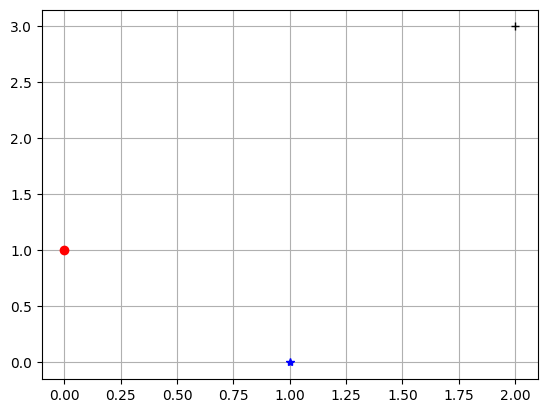

In [15]:
# BEGIN SOLUTION
class Point_System:
    def __init__(self,P1,P2,P3):
        self.P1=P1
        self.P2=P2
        self.P3=P3
        
    def pythagoras(self,x1,y1,x2,y2):
        return ((x1-x2)**2+(y1-y2)**2)**0.5

    def a_b(self,d1,d2):
        a_num = d1**2-d2**2 - ((self.P1.x**2+self.P1.y**2)-(self.P2.x**2+self.P2.y**2))
        a_den = 2*(self.P2.y-self.P1.y)
        a = a_num / a_den
        b = -(self.P2.x-self.P1.x)/(self.P2.y-self.P1.y)
        return a, b
    
    def x_y(self,d1,d2):
        a, b = self.a_b(d1,d2)
        rad=4*(b*(a-self.P1.y)-self.P1.x)**2 - 4*(1+b**2)*(self.P1.x**2-d1**2+(self.P1.y-a)**2)
        pre=2*(self.P1.x-b*(a-self.P1.y))
        den=2*(1+b**2)
        xp=(pre+(rad)**0.5)/den
        xm=(pre-(rad)**0.5)/den
        yp=a+xp*b
        ym=a+xm*b
        return xm,ym,xp,yp
    
    def triangulate(self,d1,d2):
        xm,ym,xp,yp = self.x_y(d1, d2) # solve for possible solutions (x-,y-) and (x+,y+)
        
        d3m=self.pythagoras(self.P3.x,self.P3.y,xm,ym) # calculate the distance between (x-,y-) and point 3

        d3p=self.pythagoras(self.P3.x,self.P3.y,xp,yp) # calculate the distance between (x+,y+) and point 3

        if d3m < d3p: # if (x-,y-) is closer to point 3
            xf, yf= xm, ym # final solution (xf,yf) is (x-,y-)
            
        else: # otherwise (x+,y+) is closer to point 3
            xf, yf= xp, yp # final solution (xf,yf) is (x+,y+)

        return xf, yf # return the triangulated point    
# END SOLUTION
    
# create Point object P1, P2, P3
Pt1 = Point(0,1,1)
Pt2 = Point(1,0,2)
Pt3 = Point(2,3,2)

# Create Point_System object System, using P1, P2, P3 as inputs
System = Point_System(Pt1,Pt2,Pt3)

# Plot points Point_System objects P1, P2, P3
plt.clf()
plt.plot(System.P1.x,System.P1.y,'ro')
plt.plot(System.P2.x,System.P2.y,'b*')
plt.plot(System.P3.x,System.P3.y,'k+')
plt.grid()

In [16]:
""" # BEGIN TEST CONFIG
points: 1
success_message: Point_System.P1.x is correct.
""" # END TEST CONFIG

import numpy as np

P_Sys = Point_System(Point(0,1,1),Point(1,0,2),Point(2,3,2))

import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(P_Sys)

assert np.all(np.isclose((P_Sys.P1.x,P_Sys.P1.y,P_Sys.P1.t), (0,1,1)) )

In [17]:
""" # BEGIN TEST CONFIG
points: 1
success_message: Point_System.P1.y is correct.
""" # END TEST CONFIG

import numpy as np

P_Sys = Point_System(Point(0,1,1),Point(1,0,2),Point(2,3,2))

import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(P_Sys)

assert np.all(np.isclose((P_Sys.P2.x,P_Sys.P2.y,P_Sys.P2.t), (1,0,2)) )

In [18]:
""" # BEGIN TEST CONFIG
points: 1
success_message: Point_System.P1.t is correct.
""" # END TEST CONFIG


import numpy as np

P_Sys = Point_System(Point(0,1,1),Point(1,0,2),Point(2,3,2))

import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(P_Sys)

assert np.all(np.isclose((P_Sys.P3.x,P_Sys.P3.y,P_Sys.P3.t), (2,3,2)) )

In [19]:
""" # BEGIN TEST CONFIG
points: 1
success_message: Point_System.pythagoras(0,0,0,0) is correct.
""" # END TEST CONFIG

import numpy as np

P_Sys = Point_System(Point(0,1,1),Point(1,0,2),Point(2,3,2))
answer = P_Sys.pythagoras(0,0,0,0)

import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(answer)

assert np.all(np.isclose(answer, 0))

In [20]:
""" # BEGIN TEST CONFIG
points: 1
success_message: Point_System.pythagoras(-2,3,4,1) is correct.
""" # END TEST CONFIG

import numpy as np

P_Sys = Point_System(Point(0,1,1),Point(1,0,2),Point(2,3,2))
answer = P_Sys.pythagoras(-2,3,4,1)

import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(answer)

assert np.all(np.isclose(answer, 6.324555320336759))

In [21]:
""" # BEGIN TEST CONFIG
points: 1
success_message: Point_System.a_b(1,2) is correct.
""" # END TEST CONFIG

import numpy as np

P_Sys = Point_System(Point(0,1,1),Point(1,0,2),Point(2,3,2))
answer = P_Sys.a_b(1,2)

import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(answer)

assert np.all(np.isclose(answer, (1.5, 1.0)))

In [22]:
""" # BEGIN TEST CONFIG
points: 1
success_message: Point_System.a_b(3,.6) is correct.
""" # END TEST CONFIG

import numpy as np

P_Sys = Point_System(Point(0,1,1),Point(1,0,2),Point(2,3,2))
answer = P_Sys.a_b(3,.6)

import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(answer)

assert np.all(np.isclose(answer, (-4.32, 1.0)))

In [23]:
""" # BEGIN TEST CONFIG
points: 1
success_message: Point_System.x_y(1,2) is correct.
""" # END TEST CONFIG

import numpy as np

P_Sys = Point_System(Point(0,1,1),Point(1,0,2),Point(2,3,2))
answer = P_Sys.x_y(1,2)

import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(answer)

assert np.all(np.isclose(answer, (-0.9114378277661477, 0.5885621722338523, 0.4114378277661477, 1.9114378277661477)))

In [24]:
""" # BEGIN TEST CONFIG
points: 1
success_message: Point_System.x_y(3,2.5) is correct.
""" # END TEST CONFIG

import numpy as np

P_Sys = Point_System(Point(0,1,1),Point(1,0,2),Point(2,3,2))
answer = P_Sys.x_y(3,2.5)

import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(answer)

assert np.all(np.isclose(answer, (-0.5702951388031541, -1.945295138803154, 2.945295138803154, 1.570295138803154) ))

In [25]:
""" # BEGIN TEST CONFIG
points: 1
success_message: Point_System.triangulate(1,2) is correct.
""" # END TEST CONFIG

import numpy as np

P_Sys = Point_System(Point(0,1,1),Point(1,0,2),Point(2,3,2))
answer = P_Sys.triangulate(1,2)

import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(answer)

assert np.all(np.isclose(answer, (0.4114378277661477, 1.9114378277661477) ))

In [26]:
""" # BEGIN TEST CONFIG
points: 1
success_message: Point_System.triangulate(3,.6) is correct.
""" # END TEST CONFIG

import numpy as np

P_Sys = Point_System(Point(0,1,1),Point(1,0,2),Point(2,3,2))
answer = P_Sys.triangulate(3,2.5)

import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(answer)

assert np.all(np.isclose(answer, (2.945295138803154, 1.570295138803154) ))

## Task 3: Predict location of pollutant and diffusivity

Our system consists of three points,$P_1=(-4,7), P_2=(-5,-6), P_3=(9,1)$, and a pollution source with unknown coordinates and diffusion coefficient $K$. After the release of the chemical, the pollution peaked at the three points were detected at times $300,400,500$ respectively. We want to estimate $K$ and the coordinates of the pollutant.

We can achieve this using an iterative process that slowly modifies K by multiplying it by a change factor $\epsilon$, and recalculates the predicted coordinates. The process will repeat until K is modified by less than a factor of $10^{-6}$ (In other words, when $|K-K\epsilon|<K*10^{-6}$). Write a code to do the following:

* Create `Point` objects `P1`, `P2` and `P3`, initialized with the coordinates and times given above
* Create a `Point_System` object initialized with point objects `P1`, `P2` and `P3`.
* We are satisfied with our guess when K changes by less than a factor of $10^{-6}$ per iteration. Assign this value to variable `criteria`. This variable will not change!
* Assign 1.0 as our initial guess of `K`
* Assign 0 as our initial change factor, `epsilon`
* Write a loop that runs until K is modified by less than a factor of $10^{-6}$. Inside, the loop performs the following steps:
  1. Compute the distances of `d1`, `d2`, and `d3` with the given values of K.
  2. Use triangulation to find the points `xf,yf`, which are the correct distance from P1 and P2, and closest to P3.
  3. Compute the distance `d3_`, which is the distance between `(xf,yf)` and `P3`.
  4. Calculate our change factor `epsilon` using the following equation: $\epsilon=\sqrt{d_{3 true}/d_{3 guess}}$.
  5. print the values of `d3_`, `d3`, `epsilon`, and `K`.
  6. Change $K$ to $K\epsilon$.

Your code replaces the prompt:  `...`


In [27]:
# Define Variables
# BEGIN SOLUTION
P1 = Point(-4,7,300)
P2 = Point(-5,-6,400)
P3 = Point(9,1,500)

Sys = Point_System(P1,P2,P3)

criteria = 1e-6
K = 1.0
epsilon = criteria
# END SOLUTION

# create loop that modifies K
# BEGIN SOLUTION
while abs(1-epsilon)>criteria:
    d1 = P1.diffusion_distance(K)
    d2 = P2.diffusion_distance(K)
    d3 = P3.diffusion_distance(K)

    xf,yf = Sys.triangulate(d1,d2)
    d3_ = Sys.pythagoras(P3.x,P3.y,xf,yf)

    epsilon = (d3_/d3)**0.5
    
    print(f'{d3_} {d3} {epsilon} {K}\n')

    K = K*epsilon
# END SOLUTION

# Print the estimated diffusivity
print(f'Diffusivity of X is about {K**2:.3f}')
# Print the estimated location of the point source
print(f'Evil point source is ({xf:.3f},{yf:.3f})')

4.348028416873108 22.360679774997898 0.4409645588531818 1.0

8.45855868846569 9.860267292639213 0.9261980013307073 0.4409645588531818

9.530314809983397 9.132559859028984 1.021544664007495 0.40842049306749406

9.222424526150503 9.329317792720099 0.9942546054484721 0.4172197753644087

9.304689334490563 9.275717181104334 1.00156050280975 0.41482268314024034

9.28236189979332 9.290191963827894 0.9995784955458209 0.41547001510282877

9.28839383195481 9.286276106534963 1.0001140179698007 0.4152948926408851

9.286762262877394 9.287334908883638 0.999969170120422 0.4153422437214126

9.287203436904191 9.287048581466797 1.0000083371369555 0.415329438770055

9.287084133335915 9.287126008862733 0.9999977455041537 0.4153329014284677

9.287116394970834 9.287105071075722 1.0000006096567 0.4153319650621666

Diffusivity of X is about 0.173
Evil point source is (-0.286,0.839)


In [28]:
""" # BEGIN TEST CONFIG
points: 1
success_message: Point_System.P1.x is correct.
""" # END TEST CONFIG

import numpy as np

import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(P1.x)
drexel_jupyter_logger.variable_logger(P1.y)
drexel_jupyter_logger.variable_logger(P1.t)

assert np.all(np.isclose((P1.x,P1.y,P1.t),(-4,7,300))) and\
        np.all(np.isclose((P2.x,P2.y,P2.t),(-5,-6,400))) and\
        np.all(np.isclose((P3.x,P3.y,P3.t),(9,1,500)))

In [29]:
""" # BEGIN TEST CONFIG
points: 1
success_message: Point_System.P1.y is correct.
""" # END TEST CONFIG

import numpy as np
import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(Sys)

assert np.all(np.isclose((Sys.P1.x,Sys.P1.y,Sys.P1.t),(-4,7,300))) and\
        np.all(np.isclose((Sys.P2.x,Sys.P2.y,Sys.P2.t),(-5,-6,400))) and\
        np.all(np.isclose((Sys.P3.x,Sys.P3.y,Sys.P3.t),(9,1,500)))

NameError: name 'sys' is not defined

In [30]:
""" # BEGIN TEST CONFIG
points: 8
success_message: loop construction is correct.
""" # END TEST CONFIG


import numpy as np
import drexel_jupyter_logger
drexel_jupyter_logger.variable_logger(d3_)


assert np.all(np.isclose((d3_,d3,epsilon,K),(9.287116394970834,9.287105071075722,1.0000006096567,0.4153319650621666)) )

Take a look at the points and the pollutant source

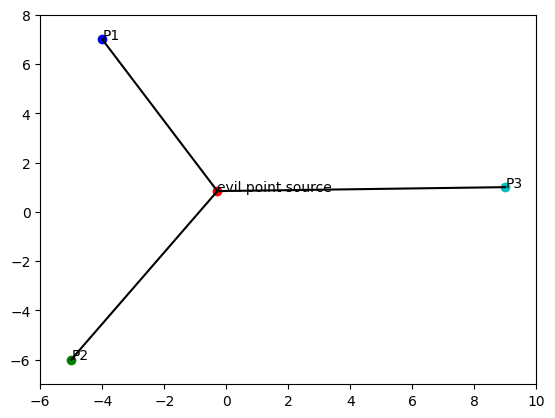

In [31]:
import matplotlib.pyplot as plt

plt.clf()
plt.xlim([min([P1.x,P2.x,P3.x,xf])-1,max([P1.x,P2.x,P3.x,xf])+1])
plt.ylim([min([P1.y,P2.y,P3.y,yf])-1,max([P1.y,P2.y,P3.y,yf])+1])
plt.plot(P1.x,P1.y,'bo')
plt.plot(P2.x,P2.y,'go')
plt.plot(P3.x,P3.y,'co')
plt.plot(xf,yf,'ro')

plt.plot([P1.x,xf],[P1.y,yf],'k-')
plt.plot([P2.x,xf],[P2.y,yf],'k-')
plt.plot([P3.x,xf],[P3.y,yf],'k-')

plt.annotate('P1',xy=(P1.x,P1.y))
plt.annotate('P2',xy=(P2.x,P2.y))
plt.annotate('P3',xy=(P3.x,P3.y))
plt.annotate('evil point source',xy=(xf,yf))
plt.show()
